In [1]:
library(tidyverse)
library(Seurat)
library(targets)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
source("../00_preprocessing/splitwrapper.R")
source(paste0("../00_preprocessing/preprocessing.R"))
source(paste0("../01_milo/milo.R"))
source(paste0("../01_milo/milo_plotting.R"))
source(paste0("../00_cellbender/cellbender_preprocess.R"))
source("../00_cellbender/process_seurat.R")
source('milo_cellbender.R')

In [137]:
obj = qs::qread('_targets/objects/obj_Nfib_1')
obj

An object of class Seurat 
19961 features across 2245 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

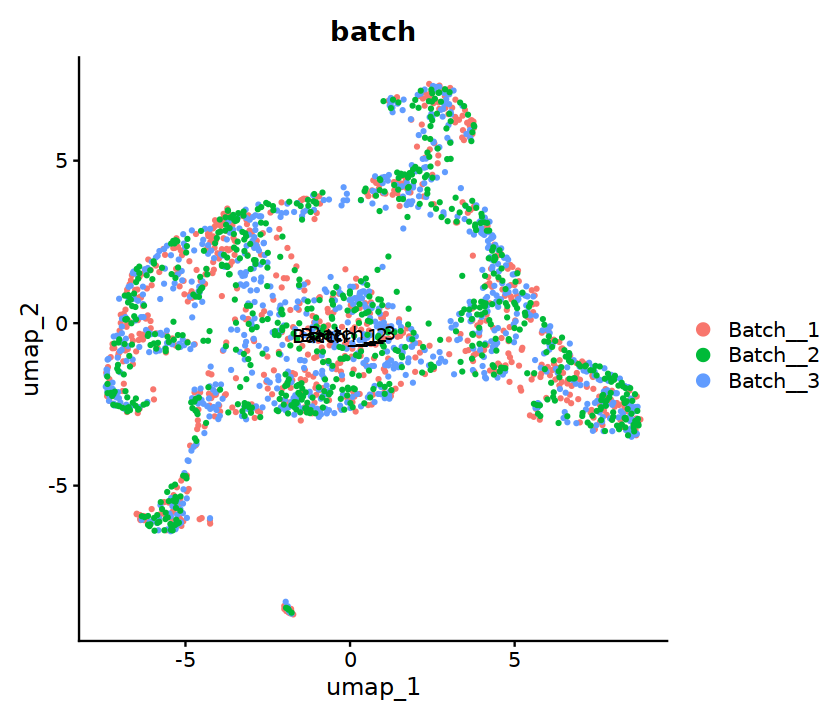

In [138]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) 

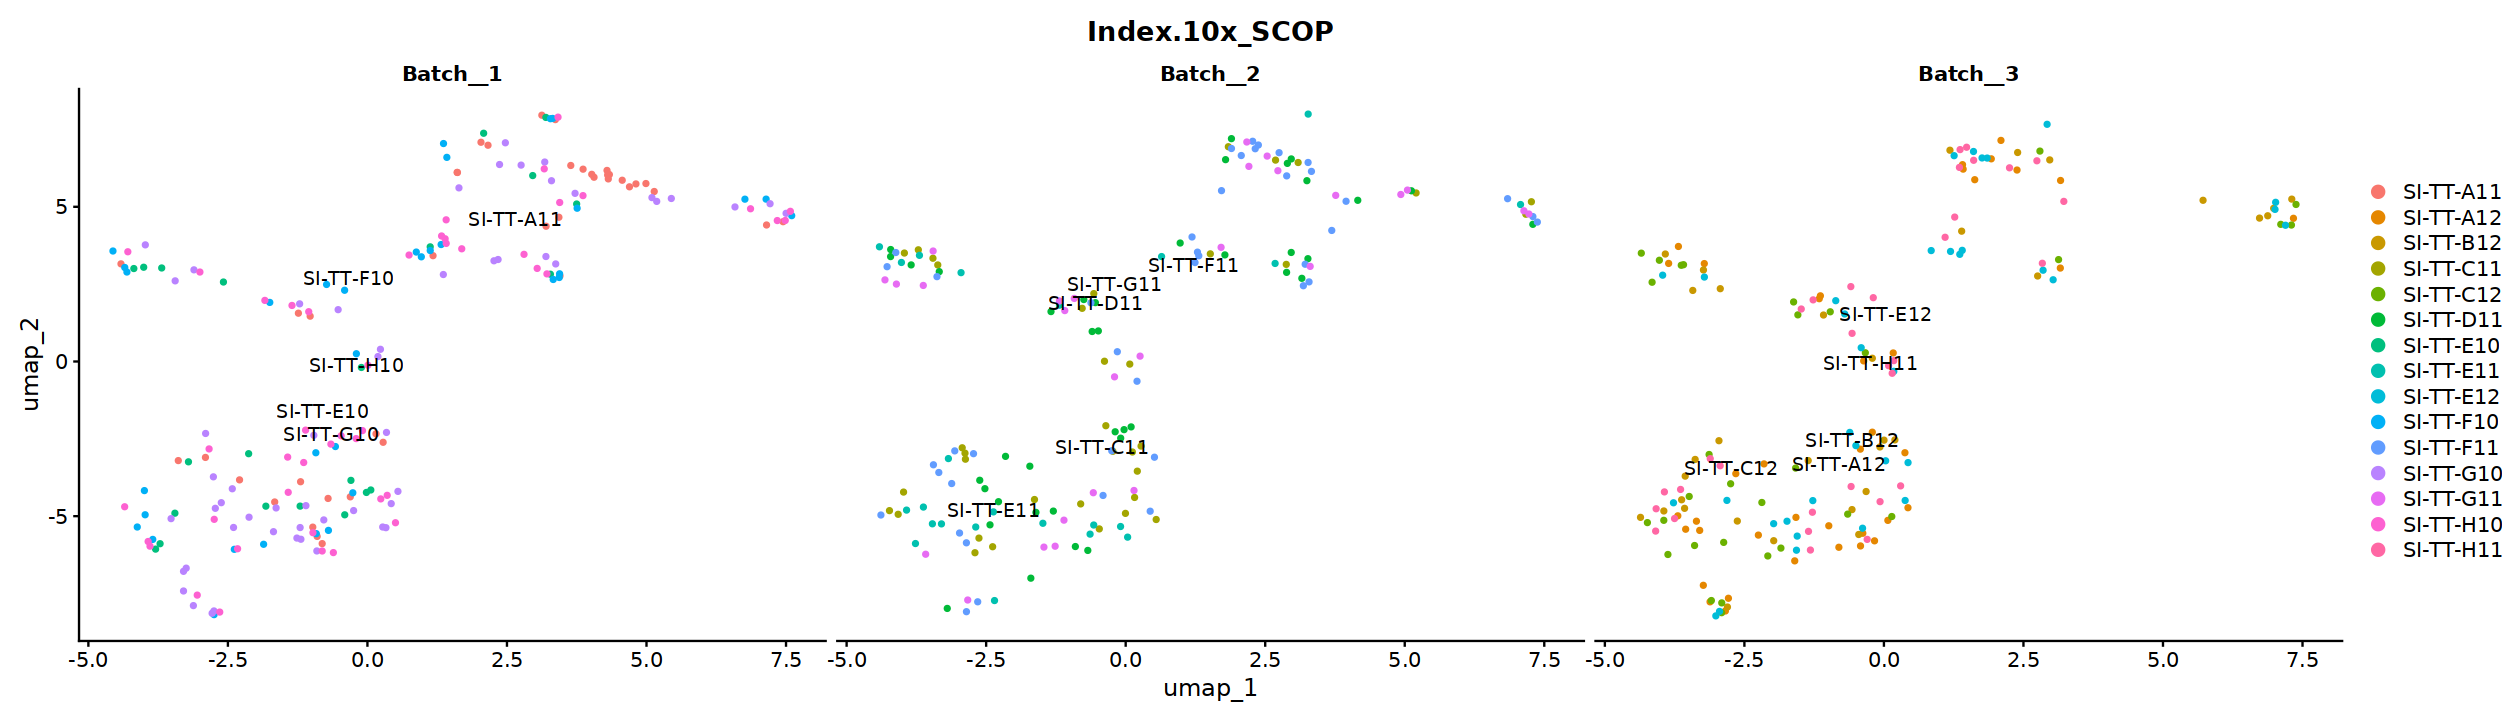

In [134]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x_SCOP', split.by='batch', label=T) 

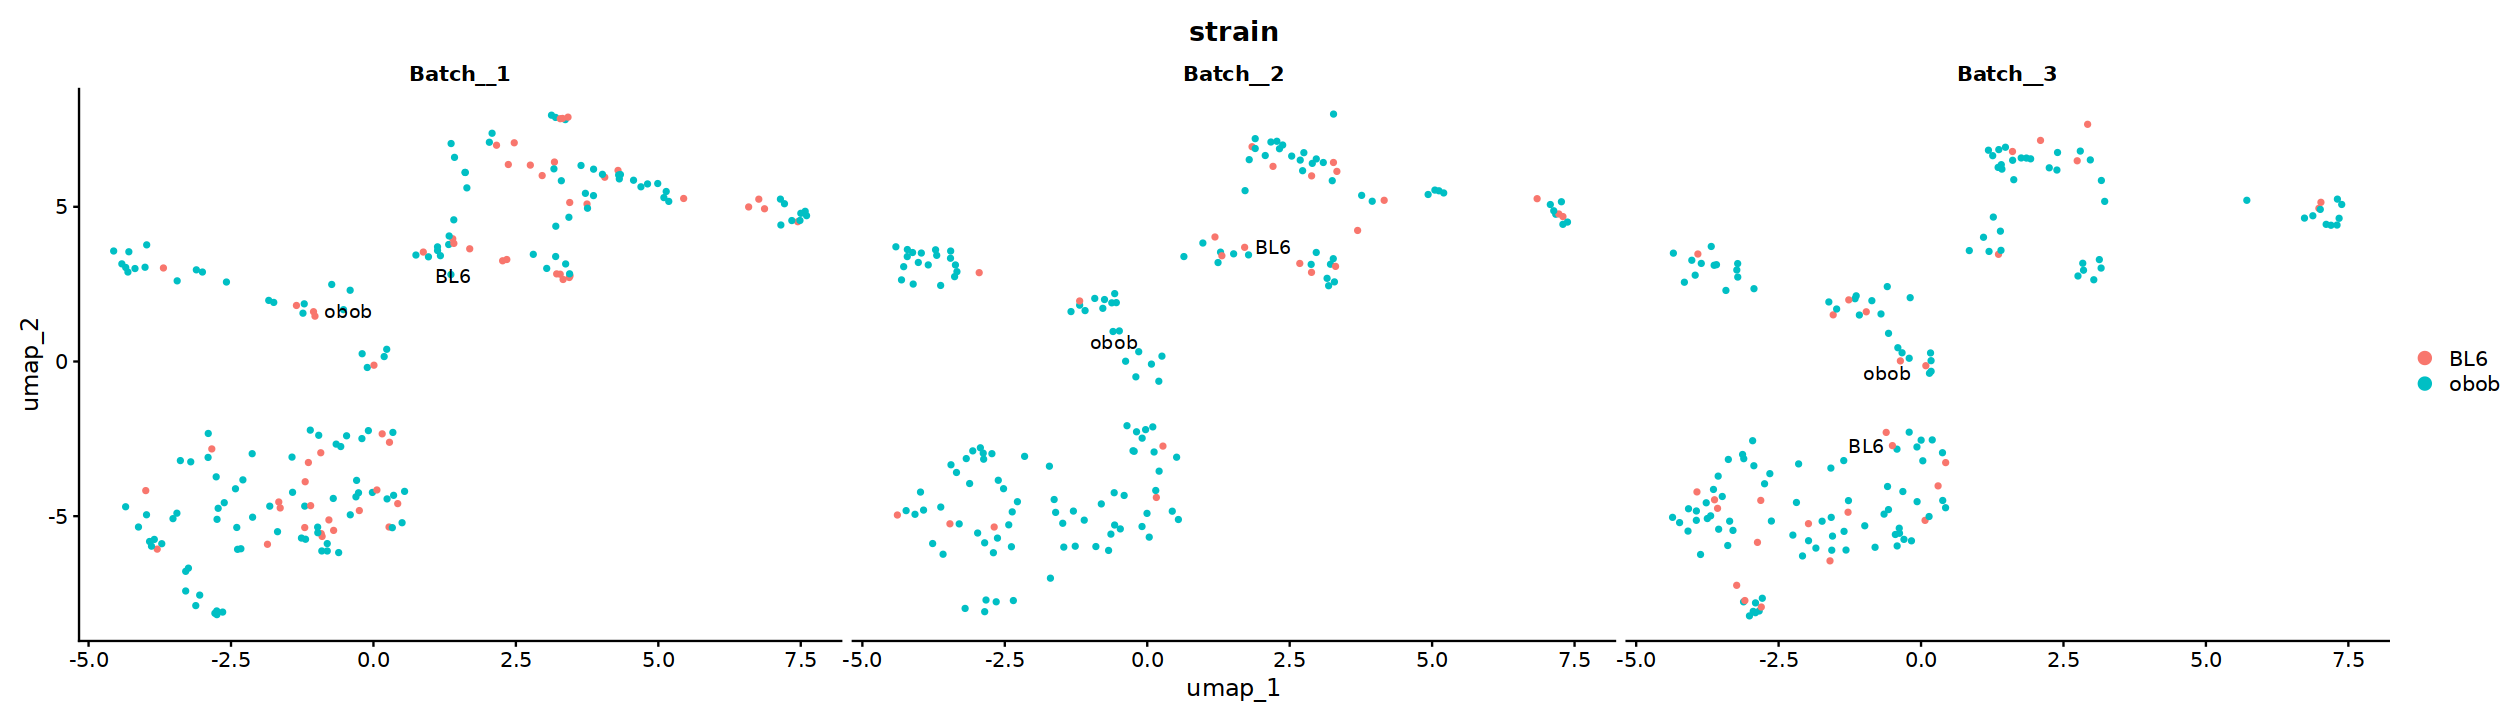

In [135]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='strain', split.by='batch', label=T) 

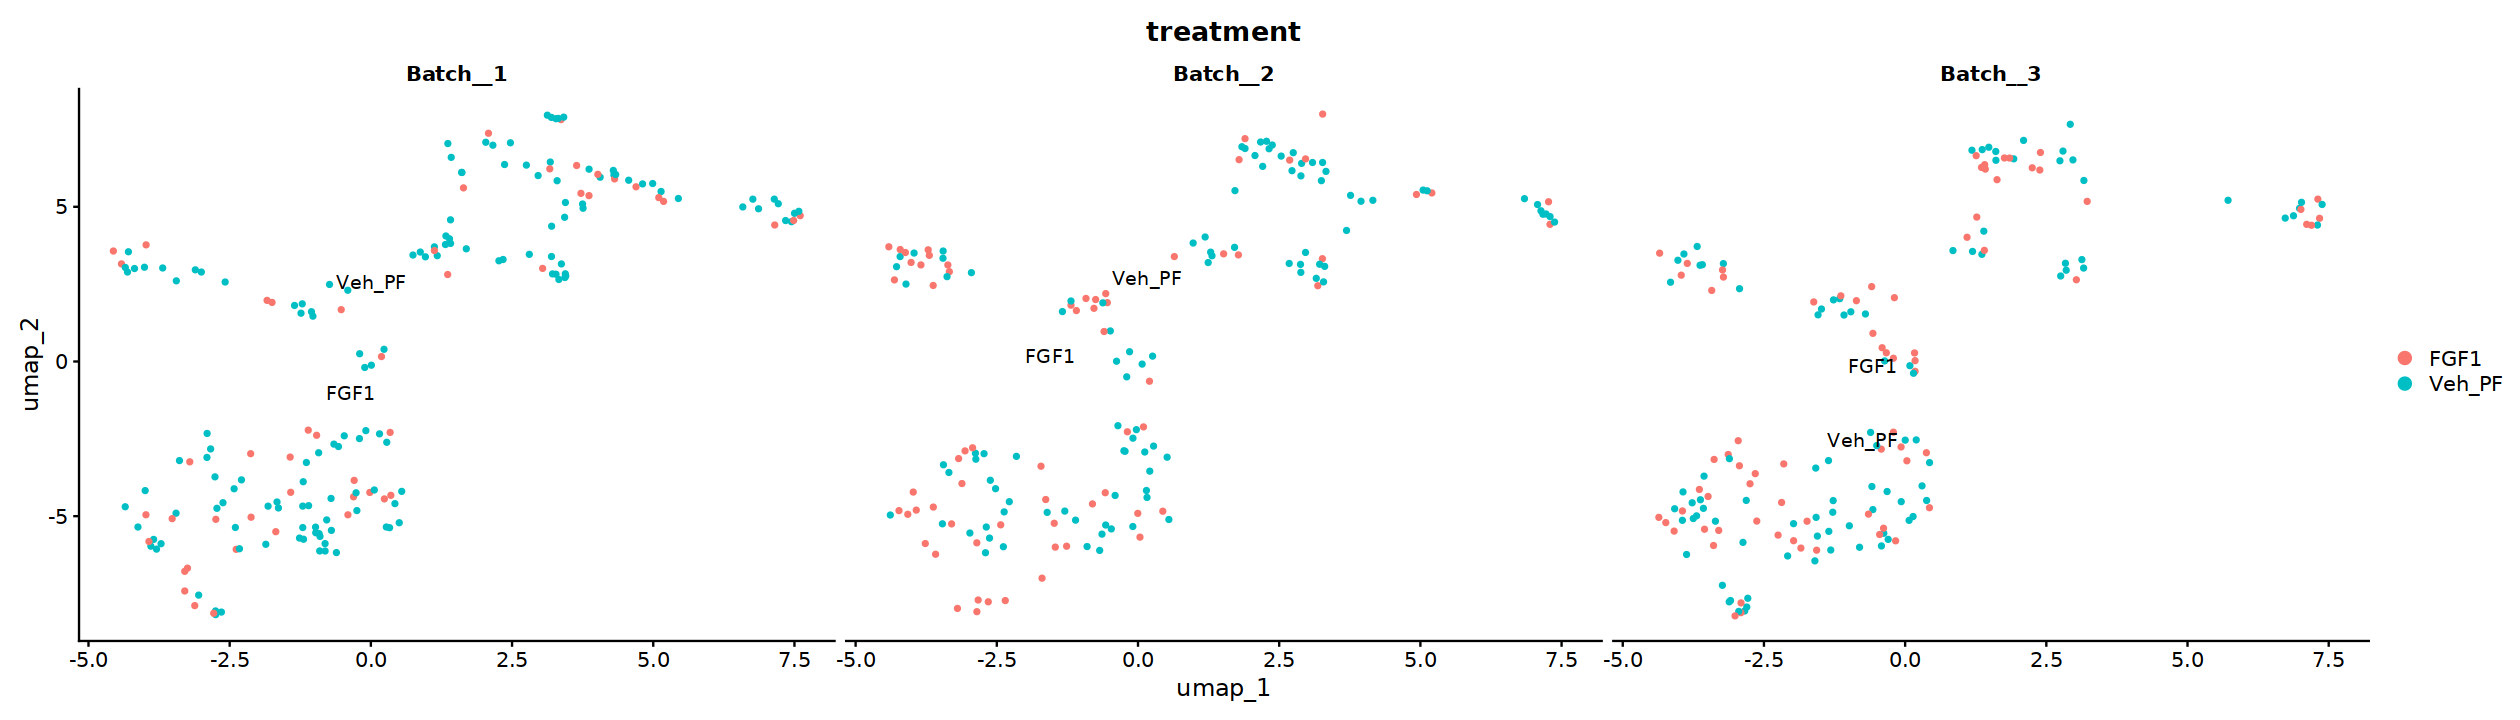

In [136]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='treatment', split.by='batch', label=T) 

In [41]:
DefaultAssay(obj) = 'RNA'

In [44]:
obj.list <- SplitObject(obj, split.by = "batch")
obj.list <- lapply(X = obj.list, FUN = SCTransform, method = "glmGamPoi")
features <- SelectIntegrationFeatures(object.list = obj.list, nfeatures = 3000)
obj.list <- PrepSCTIntegration(object.list = obj.list, anchor.features = features)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 10881 by 448

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 448 cells

Found 68 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10881 genes

Computing corrected count matrix for 10881 genes

Calculating gene attributes

Wall clock passed: Time difference of 6.657304 secs

Determine variable features

Centering data matrix

Set default assay to SCT

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 6854 by 324

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gen

In [45]:
obj.list <- lapply(X = obj.list, FUN = RunPCA, features = features)

PC_ 1 
Positive:  Nnat, Nrxn1, Rora, Wdr17, Ntrk2, Msi2, Pbx1, Adgrb3, Pitpnc1, Lsamp 
	   Nrcam, Mir99ahg, Ptprt, Dgkb, Utrn, Nebl, Slit2, Mapk4, Trpm3, Rfx3 
	   Agbl4, Fat3, Ctnnd2, Spon1, Zeb1, Cpe, Sox6, Sfxn5, Sorbs2os, Gpc6 
Negative:  Pcdh9, Nkain2, Slc24a2, Tmeff2, Plp1, Pde4b, Plcl1, Pex5l, Mast4, St18 
	   Dock10, Frmd5, Magi2, Prr5l, Lrp1b, Ptprd, Edil3, Elmo1, Ano4, Neat1 
	   Prickle2, Rnf220, Hecw2, Zfp536, 4930419G24Rik, Unc5c, Pacrg, St6galnac3, A330015K06Rik, Slc8a1 
PC_ 2 
Positive:  Pcdh9, Zbtb20, Tmeff2, Pitpnc1, Wdr17, Utrn, Mir99ahg, Npas3, Sox6, Nkain2 
	   Mapk4, Slc1a3, Ptprt, Trps1, Slc39a12, Zeb1, Glis3, Mdga2, Msi2, Slit2 
	   Rora, Nckap5, Nebl, Fat3, Slc24a2, Plcl1, Spon1, Erbb4, Col23a1, Prex2 
Negative:  AY036118, Cst3, Apoe, Gm42418, Scg5, Calm2, Gm48091, Gnas, Atp1b1, Resp18 
	   Zranb2, Ahi1, Pgrmc1, Tecr, Ubb, Atp6v0b, Pcsk1n, Atp9a, Calm1, Atp6v0c 
	   Eef1a1, Ttc3, Tmem59, Rpl34, Tmem108, Ndn, Pclo, Cmss1, Rpl27a, Gm15398 
PC_ 3 
Positive:  Kirrel

In [53]:
obj.anchors <- FindIntegrationAnchors(object.list = obj.list, normalization.method = "SCT",
anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 25)

obj.combined.sct <- IntegrateData(anchorset = obj.anchors, normalization.method = "SCT", dims = 1:30, k.weight = 50)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1889 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1719 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1746 anchors



[1] 1


Warning message:
“Different cells and/or features from existing assay SCT”


[1] 2


Warning message:
“Different cells and/or features from existing assay SCT”


[1] 3


Warning message:
“Different cells and/or features from existing assay SCT”
Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 into 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Different cells and/or features from existing assay integrated”
Warning message:
“Assay integrated changing from Assay to SCTAssay”
Warning message:
“Different cells and/or features from existing assay SCT”


In [60]:
obj.combined.sct <- RunPCA(obj.combined.sct, verbose = FALSE)
obj.combined.sct <- RunUMAP(obj.combined.sct, reduction = "pca", dims = 1:20)

ERROR: [1m[33mError[39m in `object[[reduction]]`:[22m
[33m![39m ‘rpca’ not found in this Seurat object
 


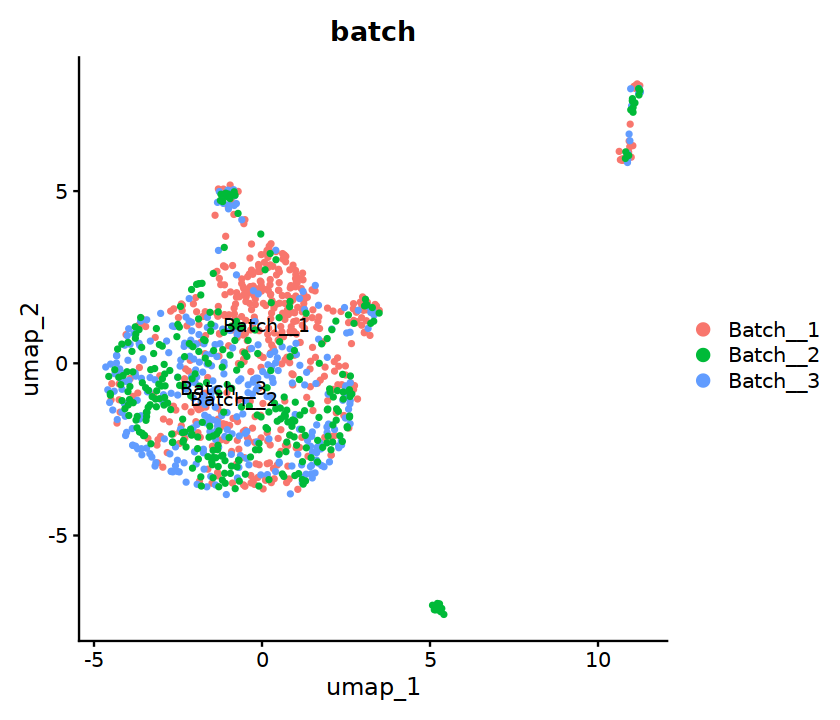

In [58]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj.combined.sct, reduction = "umap", group.by='batch', label=T) 

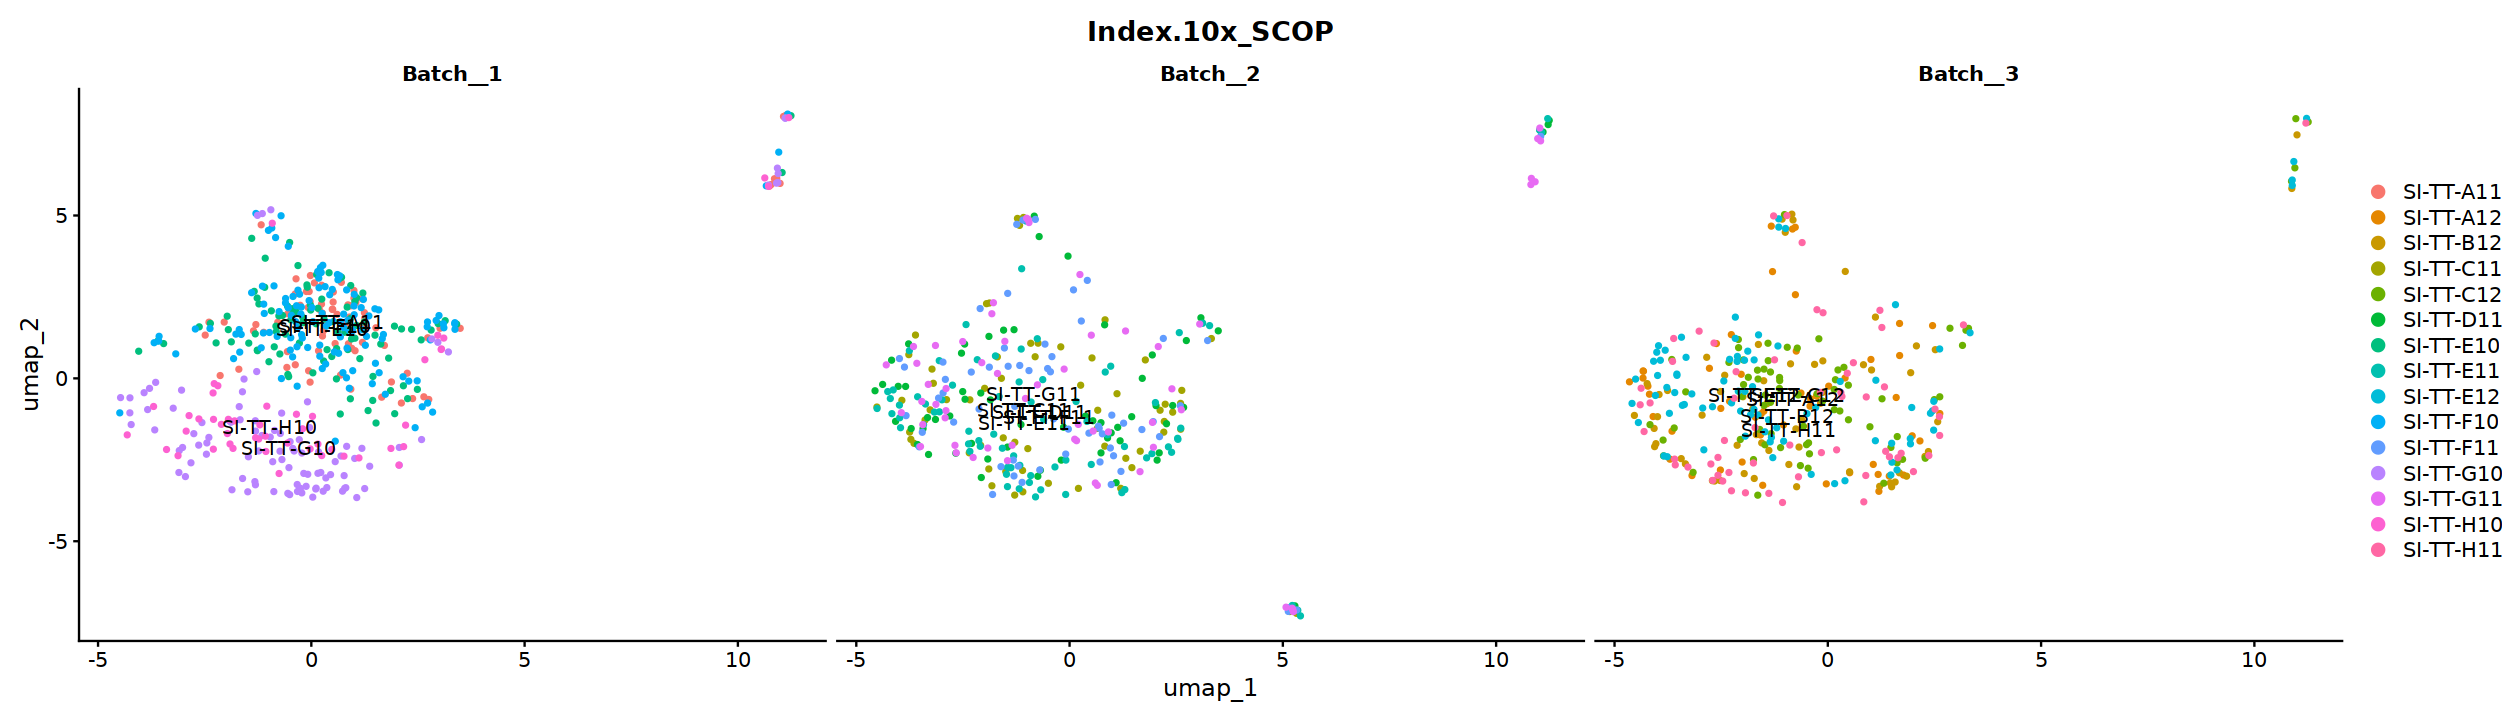

In [59]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj.combined.sct, reduction = "umap", group.by='Index.10x_SCOP', split.by='batch', label=T) 

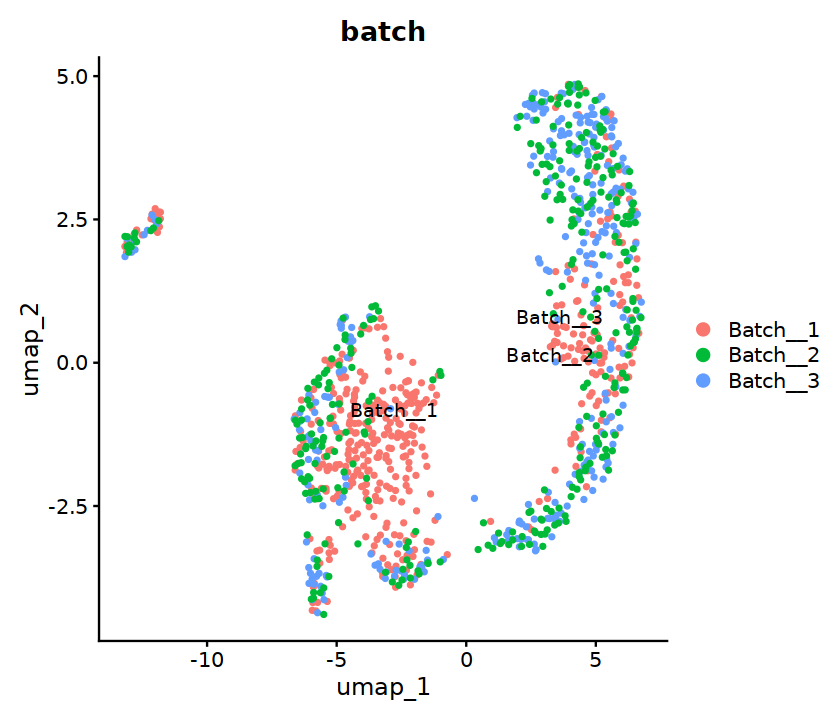

In [50]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) 

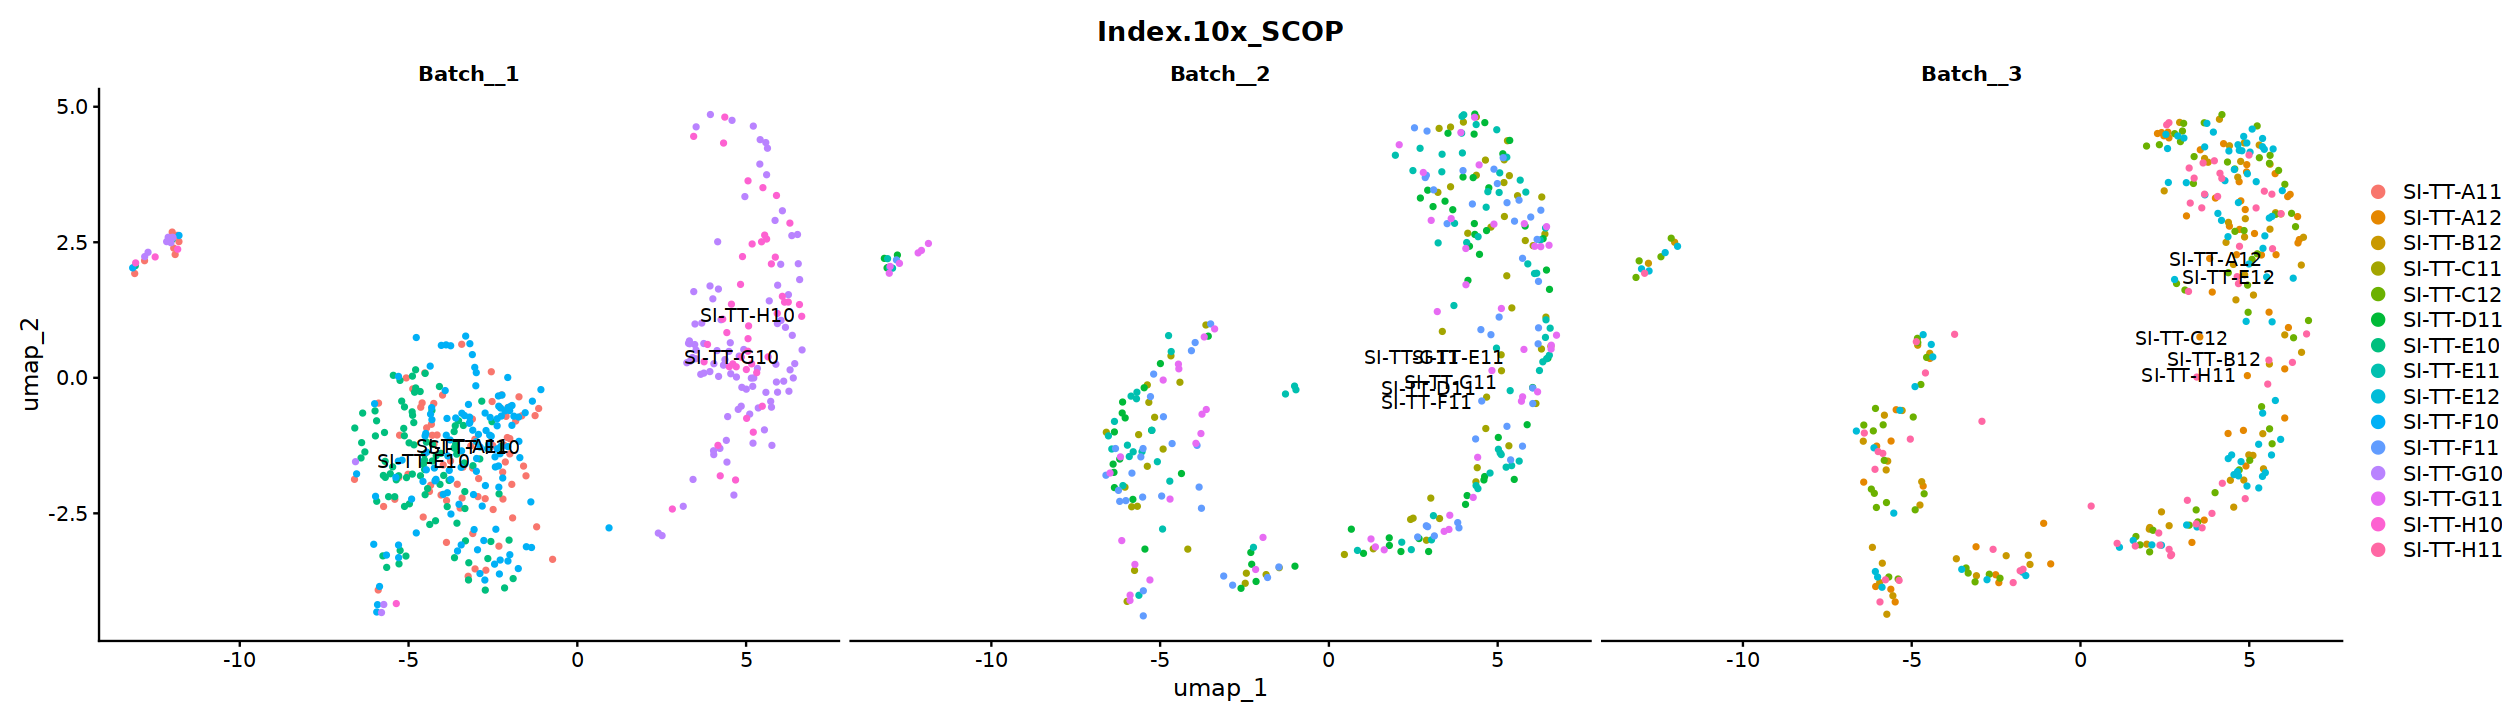

In [31]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x_SCOP', split.by='batch', label=T) 

In [4]:
obj %>% `[[` %>% group_by(Index.10x_SCOP) %>% summarise(min_count = min(nCount_RNA))

Index.10x_SCOP min_count
1  SI-TT-A11      1102     
2  SI-TT-A12      1099     
3  SI-TT-B12      1105     
4  SI-TT-C11      1101     
5  SI-TT-C12      1110     
6  SI-TT-D11      1100     
7  SI-TT-E10      2091     
8  SI-TT-E11      1101     
9  SI-TT-E12      1111     
10 SI-TT-F10      1274     
11 SI-TT-F11      1109     
12 SI-TT-G10      1100     
13 SI-TT-G11      1098     
14 SI-TT-H10      1100     
15 SI-TT-H11      1103

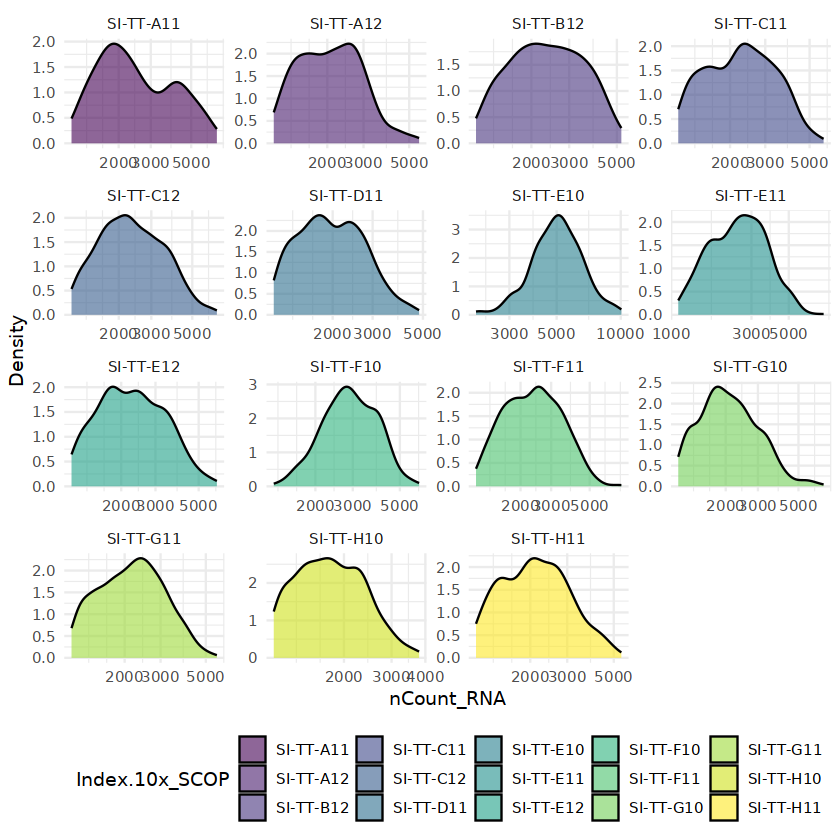

In [5]:
# Create the density plot with subplots for each group
df = obj %>% `[[`
ggplot(df, aes(x = nCount_RNA)) +
  geom_density(aes(fill = Index.10x_SCOP), alpha = 0.6) +
  facet_wrap(~ Index.10x_SCOP, scales = "free")  +
  scale_x_log10() +
  theme_minimal() +
  labs(x = "nCount_RNA", y = "Density") +
  scale_fill_viridis_d() +
  theme(legend.position = "bottom")

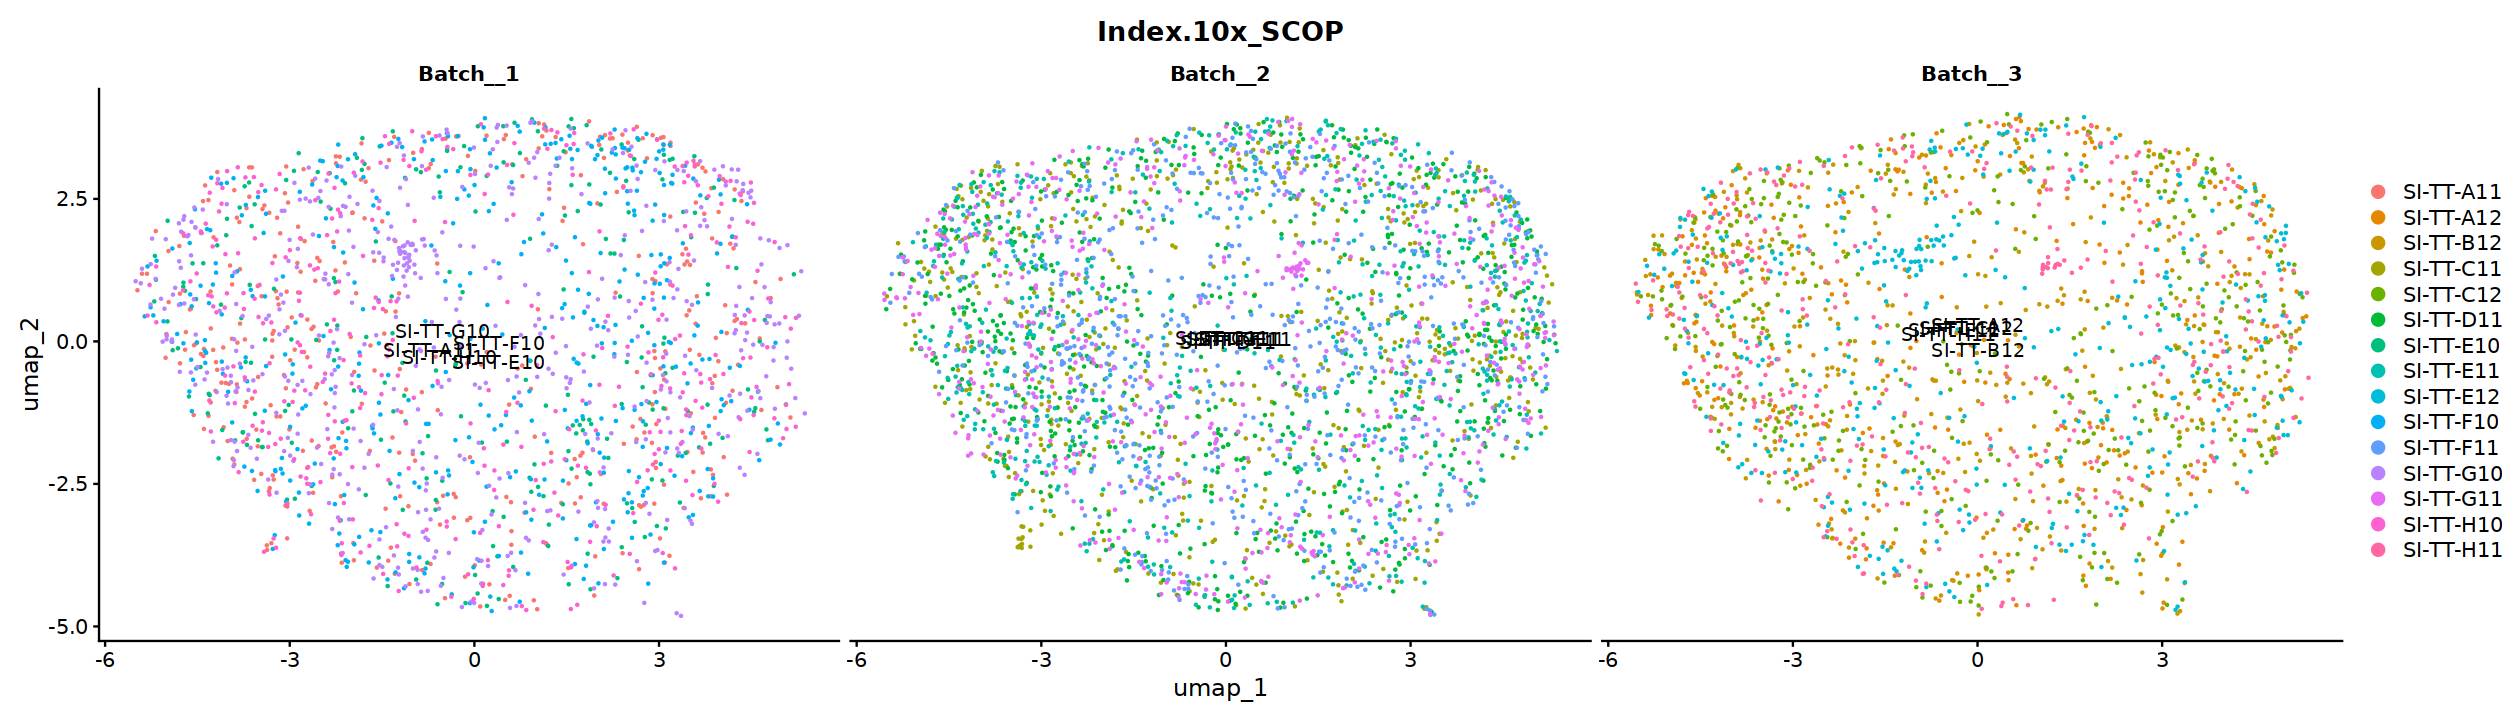

In [7]:
options(repr.plot.width=21, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x_SCOP', split.by='batch', label=T) 

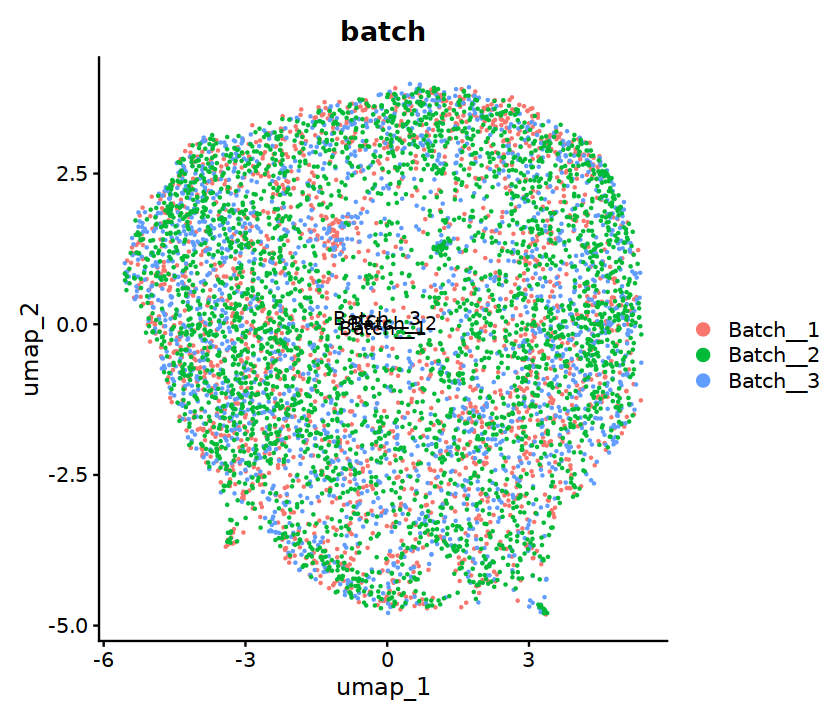

In [8]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='batch', label=T) 

In [4]:
qs::qread('clusters_tibble_lvl1.qs') %>% filter(cluster == 'Astrocytes') %>% filter(day == 'Day5')

label           object             day  cluster   
1 Day5.Astrocytes exp_labelled_other Day5 Astrocytes

In [27]:
uuid::UUIDgenerate() %>% str_split('-') %>% unlist %>% `[`(4)

[1] "a6f2"

In [8]:
tar_meta() %>%
filter(str_detect(name, "^obj_")) %>%
filter(!is.na(error))

name type data command depend seed path time size bytes format repository
     iteration parent children seconds warnings error

In [14]:
tar_meta() %>%
filter(str_detect(name, "^milo_")) %>%
filter(!str_detect(name, "^milo_index")) %>%
filter(!is.na(error)) %>%
pull(name) %>%
str_replace("milo_", "") %>% 
str_replace("Day5.|Day14.", '') %>%
unique %>%
sort

[1] "Dlk1"                "Endothelial_cells"   "g4"                 
 [4] "g7"                  "Ghrh"                "Gpr50__Tac2"        
 [7] "Kiss1__Tac2"         "Lepr67"              "Lpar1_oligo"        
[10] "Microglia"           "n10"                 "n3"                 
[13] "n6"                  "n9"                  "Nfib_1"             
[16] "Nfix__Nfib"          "Pomc__Glipr1"        "Pomc__Ttr"          
[19] "Pou6f2__Prkcq__Whrn" "Ppp1r17"             "Reln__Lef1"         
[22] "Sim1"                "Sst__Nts"            "Tbx19__Pirt"        
[25] "Th__Slc6a3"          "Tmem215__Dach2"      "Tmem215__Greb1"     
[28] "Trh__Cxcl12"         "Trh__Lef1"

In [ ]:
tar_meta() %>% colnames

In [2]:
qs::qread('_targets/objects/deg_')

ERROR: Error in qs::qread("_targets/objects/deg_Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.pos_vs_neg_restored"): Failed to open _targets/objects/deg_Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.pos_vs_neg_restored. Check file path.


In [1]:
tar_meta() %>%
filter(str_detect(name, 'deg')) %>%
filter(str_detect(name, 'Agrp')) %>%
filter(str_detect(name, 'Day14.obob14v14')) %>%
filter(!str_detect(name, 'ensmus')) %>%
filter(is.na(error))

ERROR: Error in tar_meta() %>% filter(str_detect(name, "deg")) %>% filter(str_detect(name, : could not find function "%>%"


In [6]:
combined = qs::qread('_targets/objects/nhgc')
combined %>% head

ERROR: Error in qs::qread("_targets/objects//deg_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none"): Failed to open _targets/objects//deg_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.pos_vs_none. Check file path.


In [8]:
qs::qread('_targets/objects/all_restored_summary') 

labels              n_total n_fgf1 n_fgf1.pos n_fgf1.neg prop_fgf1.pos
1   Met__Pappa2          46     1      NA          1         NA           
2   Agrp                290     0      NA         NA         NA           
3   Astrocytes          909     0      NA         NA         NA           
4   Dlk1_1               64     0      NA         NA         NA           
5   Dlk1_2               46     0      NA         NA         NA           
6   Esr1_1               82     0      NA         NA         NA           
7   Esr1_2               38     0      NA         NA         NA           
8   Esr1_3               47     0      NA         NA         NA           
9   Fezf1_2              39     0      NA         NA         NA           
10  Fezf1_3             108     0      NA         NA         NA           
11  Ghrh                101     0      NA         NA         NA           
12  Gpr50__Tac2          63     0      NA         NA         NA           
13  Hdc                  35     0      NA         NA         NA           
14  Htr3b               199     0      NA         NA         NA           
15  Irx5__Lmx1a         297     0      NA         NA         NA           
16  Kiss1__Tac2         174     0      NA         NA         NA           
17  Lepr_4              233     0      NA         NA         NA           
18  Lepr_5               41     0      NA         NA         NA           
19  Lepr_6               77     0      NA         NA         NA           
20  Lepr_7               49     0      NA         NA         NA           
21  Lepr_8              261     0      NA         NA         NA           
22  Lepr_9               27     0      NA         NA         NA           
23  Lpar1_oligo          57     0      NA         NA         NA           
24  Met__Prlh           253     0      NA         NA         NA           
25  Nfib_1              136     0      NA         NA         NA           
26  Nfib_3               30     0      NA         NA         NA           
27  Nfix__Nfib          118     0      NA         NA         NA           
28  Nfix__Nfib__Hgf      31     0      NA         NA         NA           
29  Nfix__Nfib__Lhx6    173     0      NA         NA         NA           
30  Npsr1__Epha3         96     0      NA         NA         NA           
⋮   ⋮                   ⋮       ⋮      ⋮          ⋮          ⋮            
576 Tbx19__Pirt          60     8       3          5         0.3750000    
577 Pomc__Glipr1         66     7       4          3         0.5714286    
578 Pou6f2__Prkcq__Whrn  56     3       3         NA         1.0000000    
579 Ppp1r17__Tafa4      141     3       1          2         0.3333333    
580 Irx5__Lmx1a         162     2       2         NA         1.0000000    
581 Kiss1__Tac2          84     2      NA          2                NA    
582 Slc17a6__Trhr       126     1      NA          1                NA    
583 Sst__Pthlh           38     1       1         NA         1.0000000    
584 Dlk1_1               23     0      NA         NA                NA    
585 Esr1_1               38     0      NA         NA                NA    
586 Fezf1_3              48     0      NA         NA                NA    
587 Gpr50__Tac2          27     0      NA         NA                NA    
588 Lepr_4               93     0      NA         NA                NA    
589 Lepr_6               38     0      NA         NA                NA    
590 Lepr_8              124     0      NA         NA                NA    
591 Lpar1_oligo          26     0      NA         NA                NA    
592 Met__Prlh           127     0      NA         NA                NA    
593 Nfib_1               73     0      NA         NA                NA    
594 Nfix__Nfib           55     0      NA         NA                NA    
595 Nfix__Nfib__Lhx6     85     0      NA         NA                NA    
596 Npsr1__Epha3         53     0      NA         NA                NA    
597 Oligodendrocytes     62  

In [ ]:
obj = qs::qread('_targets/objects/obj_Day14.Agrp')
obj

In [ ]:
DefaultAssay(obj) = 'RNA'

In [ ]:
obj

In [ ]:
obj@assays$RNA$scale.data %>% dim

In [ ]:
tar_meta() %>%
filter(str_detect(name, 'plot')) %>%
# filter(str_detect(name, '')) %>%
# filter(str_detect(name, 'Day14.obob14v14')) %>%
# filter(!str_detect(name, 'ensmus')) %>%
filter(is.na(error))

In [ ]:
obj@assays$RNA@features %>% length

In [ ]:
obj@assays$RNA@features %>% rownames %>% unique %>% length

In [ ]:
plot_targets = qs::qread('plot_targets.qs')

In [ ]:
plot_targets %>% 
tibble(name = .) %>%
filter(str_detect(name, 'Agrp')) %>%
pull(name) %>%
qs::qsave('plot_targets_agrp.qs')

In [ ]:
manifest = tar_manifest(fields=NULL)

In [ ]:
manifest %>% colnames

In [ ]:
manifest %>% 
filter(str_detect(name, 'Agrp___Day5.obob5v5')) %>%
filter(str_detect(name, 'reSCT')) %>%
filter(str_detect(name, 'pos_restored')) %>%
filter(str_detect(name, 'plot')) %>% 
`[`(1,) %>%
pull(command) %>%
print

In [ ]:
tar_load(obj_Day5.Agrp)
obj_Day5.Agrp

In [ ]:
tar_load(nhgc_Agrp___Day5.obob5v5__v__Day5.obobBL6d5)
nhgc_Agrp___Day5.obob5v5__v__Day5.obobBL6d5 %>% head

In [ ]:
tar_load(deg_Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_pos_restored)
deg_Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_pos_restored

In [ ]:
manifest %>% 
filter(str_detect(name, 'Agrp')) %>%
filter(str_detect(name, 'Day14.obob14v14__v__Day14.obobBL6d14')) %>%
filter(str_detect(name, 'reSCT')) %>%
filter(str_detect(name, 'plot')) %>% 
`[`(1,)  %>%
pull(command) %>% print

In [ ]:
make_summary_deg_plot(obj_Agrp, nhgc_Agrp___all.obob14v14__v__all.obob14vBL6,
                      deg_ensmus_Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none,
                      "bl6_grouping",
                      "Agrp\\nall.obob14v14__v__all.obob14vBL6\\nbl6_grouping.neg_vs_none") %>%
save_summary_plot(c("reSCT_", "Agrp___all.obob14v14__v__all.obob14vBL6___bl6_grouping.neg_vs_none"))

In [ ]:
tar_load(obj_Day14.Agrp)
obj_Day14.Agrp

In [ ]:
tar_load(nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14)
nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14 %>% head

In [ ]:
tar_load(deg_ensmus_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_rest)
deg_ensmus_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_rest

In [ ]:
source('../01_milo/milo_plotting.R')
package_vec = c("tidyverse", "ggplot2", "patchwork", "Seurat")
lapply(package_vec, library, character.only = TRUE)

In [ ]:
nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14 %>% head

In [ ]:
obj_Day14.Agrp@reductions$umap@cell.embeddings

In [ ]:
DefaultAssay(obj_Day14.Agrp) = 'RNA'
obj_Day14.Agrp

In [ ]:
FeaturePlot(obj_Day14.Agrp, features = 'Agrp')

In [ ]:
DefaultLayer(obj_Day14.Agrp)

In [ ]:
tar_load(obj_Day14.Agrp)

make_summary_deg_plot(obj_Day14.Agrp, 
                      nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14,
                      deg_ensmus_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_rest,
                      "bl6_grouping",
                      "Agrp\\nDay14.obob14v14__v__Day14.obobBL6d14\\nbl6_grouping.neg_vs_rest") %>%
save_summary_plot(., c("gSCT_", "Agrp___Day14.obob14v14__v__Day14.obobBL6d14___bl6_grouping.neg_vs_rest"))

In [ ]:
obj_milo = tar_load(milo_Day14.Agrp)

In [ ]:
obj_milo

In [ ]:
qs::qread('_targets/objects/milo_Day14.Agrp')

In [ ]:
nhgc_coords = make_nhgc_coords(nhgc_Agrp___Day14.obob14v14__v__Day14.obobBL6d14, obj_Day14.Agrp, "bl6_grouping")
nhgc_coords %>% head

In [ ]:
nhgc_coords %>% pull(umap_1) %>% is.finite %>% unique

In [ ]:
nhgc_coords %>% pull(umap_2) %>% is.finite %>% unique

In [ ]:
nhgc_coords %>% make_kde2d

In [ ]:
kdes = nhgc_coords %>%
        group_by(labels) %>%
        group_map(~ make_kde2d(.x), .keep=TRUE) %>%
        map(~ enframe_kde(.x))
kdes

In [ ]:
library(c("tidyverse", "ggplot2", "patchwork", "Seurat"), character.only = FALSE)

In [13]:
meta = tar_meta()

In [ ]:
meta  %>% 
filter(name == 'deg_Agrp___Day5.obob5v5__v__Day5.obobBL6d5___bl6_grouping.neg_vs_pos_restored')

In [15]:
meta %>%
filter(str_detect(name, 'obj_neuron'))

name type data command depend seed path time size bytes format repository
     iteration parent children seconds warnings error

In [ ]:
m

In [ ]:
tar_load(all_restored_summary)
all_restored_summary %>% head

In [ ]:
all_restored_summary %>% arrange(desc(n_restored)) %>%
filter(str_detect(comparison, 'obobBL6d14')) %>%
filter(str_detect(comparison, 'obob14v14'))

In [ ]:
targets::tar_visnetwork()

In [23]:
qs::qread('_targets/objects/deg_Agrp___Day5.obob5v5__v__Day5.obobBL6d5___restored_grouping.neg_restored_vs_none') %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC %>% `>`(1)) %>%
rownames %>%
paste0(collapse = ' ') %>% print

[1] "Pex5l Sorcs1 Gm38413 Myo16 Fam83b Rtl4 Palld Vwc2 Cdh13 Gcnt2 Rin3 Pde3a 4930434J06Rik Rorb Cyp4v3 Tmeff1 Myh15 Efhc1 Slco1a1 Fras1 Tgfb1 Tmem232 Cped1 Tmem45b F730035M05Rik Trim36 Scube2 Hcrtr2 Ptchd4 Gm34408 Gm41148 Bace2 1700026J12Rik Slc8b1 Ccdc141 Slc18a1 Gm816 Map3k15 Gm17655 Nrap Ttc41 Tshb Gm16578 Cd70 Lncbate10 Ret Depdc1a Myoz2 Igsf11 Col4a4 Gm13849 Gm11339 Vmn2r54 Bcl11a Rras2 Gm37245 Igf1r A430010J10Rik Gm42962 Hgf Pgf Prr11 Usp9y Gm20125 Syt9 4933405E24Rik Mcub Lrp5 Grip1os3 Spsb1 Gm48648 Cc2d2b Agr3"


In [26]:
qs::qread('_targets/objects/deg_Agrp___Day14.obob14v14__v__Day14.obobBL6d14___restored_grouping.neg_restored_vs_none') %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC %>% `>`(1)) %>%
rownames %>%
paste0(collapse = ' ') %>% print

[1] "Yap1 March4 Shc3 Gm47578 D16Ertd472e Folr2 Gm33732 Rgs20 Gm45352 Gm17173 Gm32004 Adamts1 Aldh1a7 March11 Gm6999 Plin2 Gm47889 A830019P07Rik Creb5 Gm47136 Gm9530 Igsf11 Sspn Gm48293 Igfbp7 C1qtnf7 Gm12239 Styk1 Wwtr1 Fmo5 Gm5820 4930479D17Rik Abtb2"


In [22]:
qs::qread('_targets/objects/deg_Agrp___Day5.obob5v5__v__Day5.obobBL6d5___fgf1_grouping.pos_vs_none') %>%
filter(p_val_adj < 0.05) %>%
filter(avg_log2FC %>% `>`(1))

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
Cntn5         1.249032e-87 1.653398   0.978 0.839 2.498065e-84
A330015K06Rik 4.728983e-58 1.903679   0.844 0.617 9.457967e-55
Tsix          4.751344e-53 2.232238   0.455 0.193 9.502687e-50
Syt1          1.001407e-52 1.111630   0.976 0.890 2.002814e-49
Kcnab1        3.188592e-51 1.501436   0.863 0.676 6.377184e-48
Galntl6       9.954102e-49 1.105678   0.949 0.757 1.990820e-45
Trpc5         1.008635e-47 1.290103   0.770 0.415 2.017270e-44
G930045G22Rik 8.026703e-43 1.658850   0.540 0.271 1.605341e-39
Il1rapl1      1.563381e-40 1.022644   0.939 0.845 3.126761e-37
Rtl4          1.330255e-38 1.240401   0.851 0.631 2.660510e-35
Synpr         1.994278e-38 1.269831   0.829 0.636 3.988555e-35
Schip1        7.810015e-37 1.402294   0.890 0.767 1.562003e-33
Mon1b         8.517718e-36 1.640379   0.413 0.128 1.703544e-32
Prr11         5.524911e-35 1.227827   0.447 0.203 1.104982e-31
B930018H19Rik 3.650537e-34 2.382144   0.521 0.315 7.301074e-31
A730090N16Rik 2.545937e-31 1.977902   0.582 0.384 5.091874e-28
6030443J06Rik 1.122389e-29 1.195418   0.707 0.448 2.244777e-26
Gm17171       9.179666e-29 1.466007   0.416 0.193 1.835933e-25
Gm48913       1.229661e-28 1.356725   0.494 0.310 2.459321e-25
Kirrel        2.275398e-28 1.383330   0.450 0.225 4.550797e-25
Col23a1       2.409400e-27 1.264802   0.716 0.549 4.818800e-24
Meltf         6.116114e-27 1.896093   0.413 0.236 1.223223e-23
Gm34022       4.418631e-26 3.267692   0.430 0.220 8.837262e-23
Nt5dc2        1.293048e-24 2.705203   0.262 0.090 2.586096e-21
C8a           3.840405e-24 1.123358   0.125 0.248 7.680810e-21
Zfp804a       5.028843e-24 1.729276   0.719 0.626 1.005769e-20
Gm36814       3.603371e-23 1.837479   0.374 0.206 7.206742e-20
Galnt14       9.141378e-23 1.852481   0.658 0.507 1.828276e-19
Gm10974       3.024555e-22 2.153746   0.377 0.216 6.049109e-19
Mnd1          5.267680e-22 1.516849   0.406 0.257 1.053536e-18
⋮             ⋮            ⋮          ⋮     ⋮     ⋮           
Col9a3        6.188510e-09 1.100057   0.538 0.437 1.237702e-05
Iqca          6.759681e-09 1.197313   0.455 0.350 1.351936e-05
Csnka2ip      8.487336e-09 2.017152   0.479 0.431 1.697467e-05
Efhc1         8.555624e-09 1.458520   0.186 0.128 1.711125e-05
Col14a1       2.009827e-08 1.014795   0.465 0.424 4.019654e-05
Bambi         2.010228e-08 1.321320   0.421 0.326 4.020456e-05
4933405D12Rik 2.548829e-08 2.680312   0.220 0.165 5.097658e-05
Gm34586       3.937792e-08 1.681759   0.262 0.119 7.875584e-05
Gm10754       5.870732e-08 1.291947   0.108 0.071 1.174146e-04
Spink13       6.021279e-08 1.013170   0.501 0.448 1.204256e-04
Nfatc1        1.790353e-07 1.266329   0.328 0.487 3.580707e-04
Sox5          2.458574e-07 1.097659   0.611 0.560 4.917149e-04
Gm45680       2.836962e-07 1.350399   0.472 0.421 5.673925e-04
Pcdh19        2.916414e-07 1.431911   0.430 0.354 5.832827e-04
Kir3dl2       4.569344e-07 1.857163   0.169 0.266 9.138687e-04
Actg2         5.602591e-07 1.114365   0.105 0.068 1.120518e-03
Gm50397       6.728074e-07 1.084576   0.298 0.461 1.345615e-03
Gm49701       7.761811e-07 1.160743   0.093 0.296 1.552362e-03
Depdc1a       1.180485e-06 2.441816   0.235 0.328 2.360969e-03
Thrb          2.225335e-06 1.136205   0.533 0.470 4.450669e-03
A830082K12Rik 2.548302e-06 1.048312   0.005 0.011 5.096604e-03
Bace2         7.520778e-06 1.056931   0.484 0.435 1.504156e-02
Sox5os4       7.659387e-06 1.114405   0.318 0.447 1.531877e-02
Gm15688       8.869999e-06 1.508436   0.110 0.169 1.774000e-02
A830035A12Rik 1.099538e-05 1.361316   0.535 0.521 2.199075e-02
Gm12111       1.223460e-05 2.371226   0.200 0.143 2.446921e-02
Gm31518       1.262366e-05 1.231428   0.337 0.277 2.524731e-02
4933412O06Rik 1.299012e-05 1.067985   0.386 0.320 2.598024e-02
Col5a3        1.314615e-05 1.248051   0.227 0.334 2.629230e-02
Tnxb          1.512160e-05 1.907899   0.443 0.349 3.024320e-02
              tag                                                               
Cntn5         Agrp___Day5.o

In [59]:
obj = qs::qread('../01_milo/_targets/objects/exp_labelled_neuron')
obj

An object of class Seurat 
59227 features across 107464 samples within 3 assays 
Active assay: SCT (26906 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [20]:
PercentageFeatureSet(obj, pattern = "^MT-")

NULL

In [29]:
source('../00_preprocessing/preprocessing.R')

In [30]:
obj = obj %>%
sc_transform_fgf1 %>%
run_sct_chaser

obj

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 19774 by 4638

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4638 cells

Found 60 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 19774 genes

Computing corrected count matrix for 19774 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.052741 mins

Determine variable features

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per sessio

An object of class Seurat 
41548 features across 4638 samples within 3 assays 
Active assay: SCT (19774 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [31]:
obj@assays$SCT$counts %>% dim

[1] 19774  4638

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



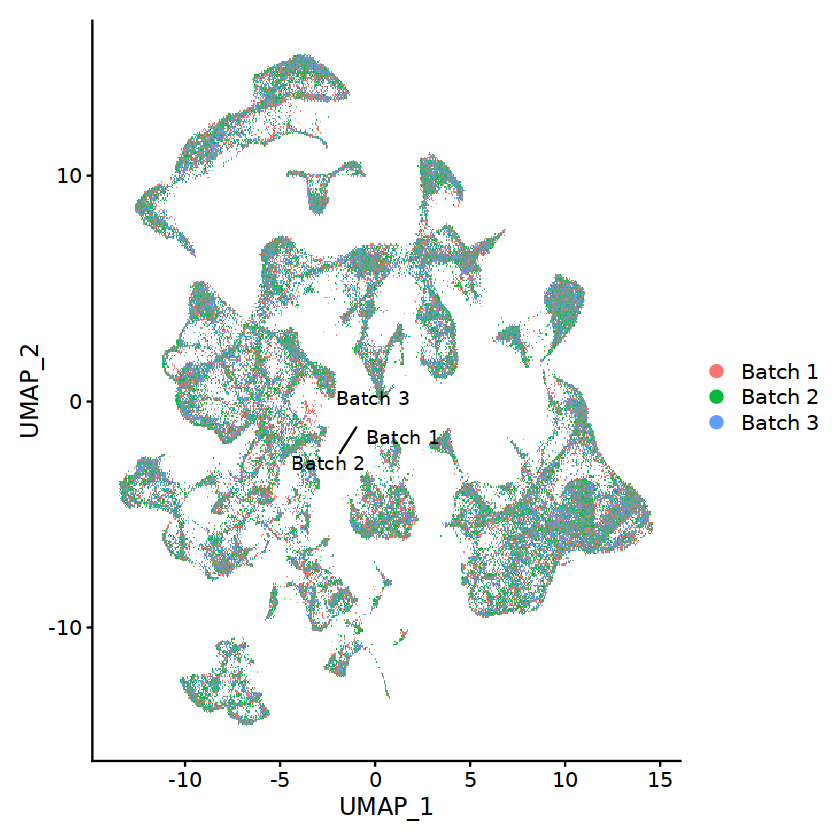

In [60]:
Idents(obj) <- obj %>% `[[` %>% pull(batch)
DimPlot(obj, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


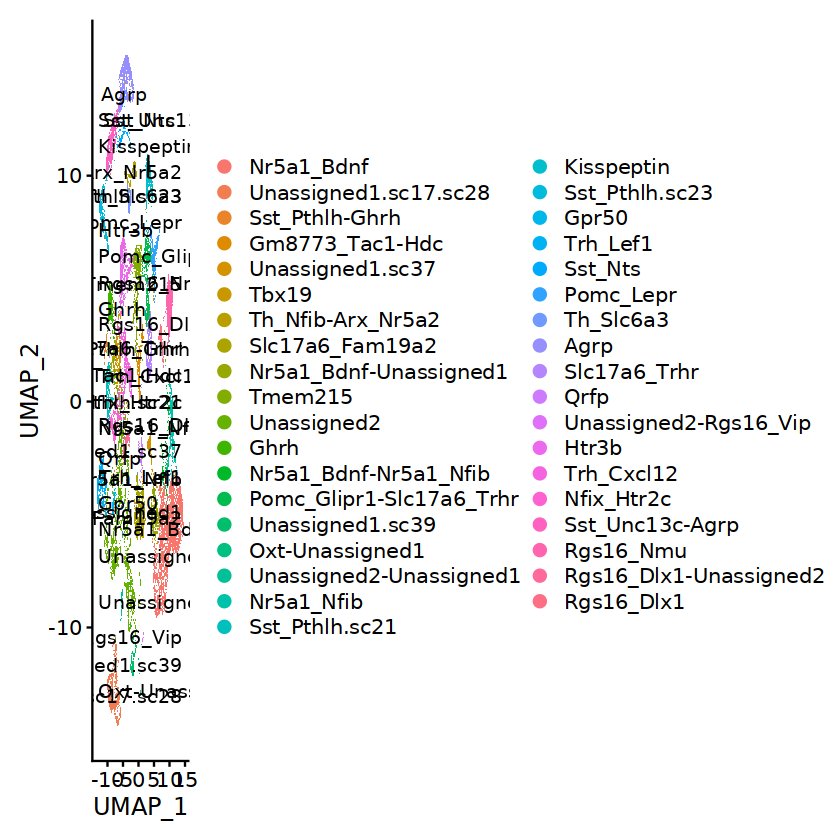

In [61]:
Idents(obj) <- obj %>% `[[` %>% pull(labels)
DimPlot(obj, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



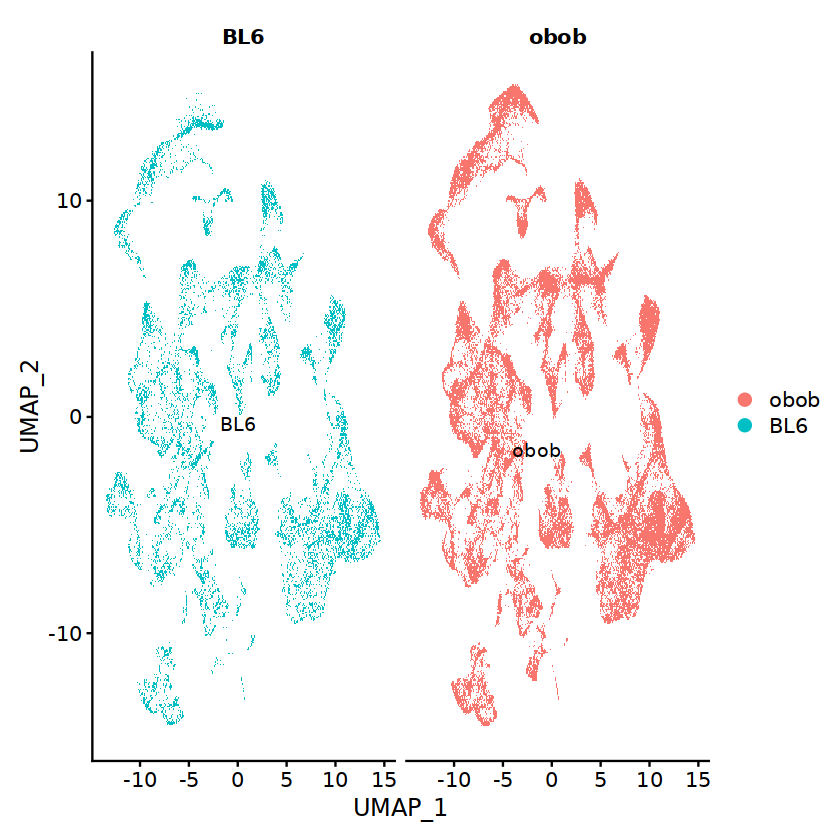

In [65]:
Idents(obj) <- obj %>% `[[` %>% pull(strain)
DimPlot(obj, reduction = "umap", label=T, repel = T, split.by = 'strain')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



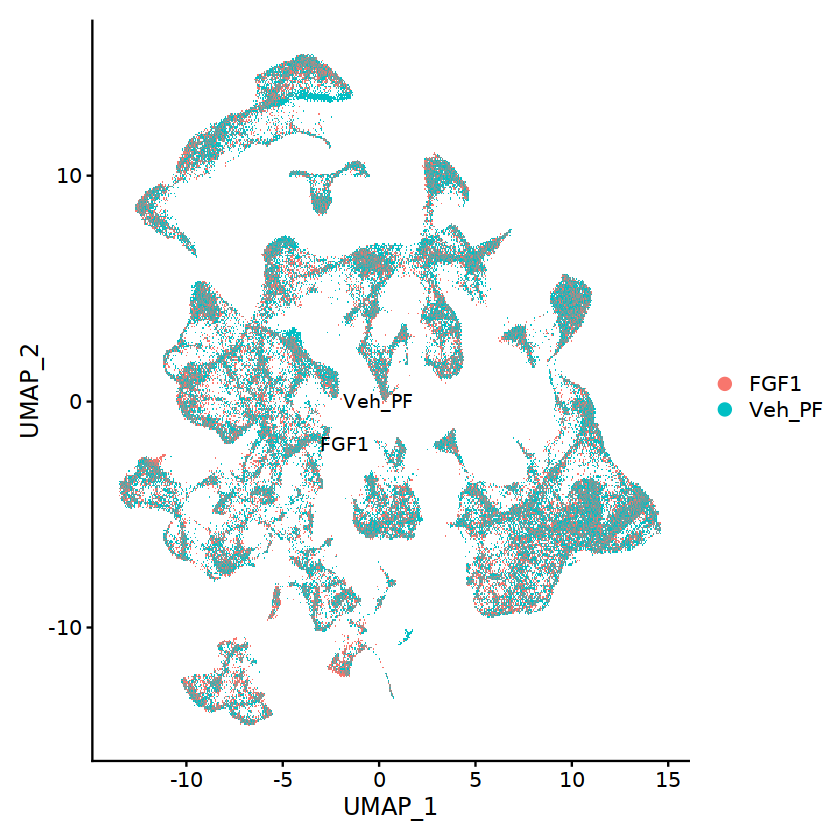

In [63]:
Idents(obj) <- obj %>% `[[` %>% pull(treatment)
DimPlot(obj, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



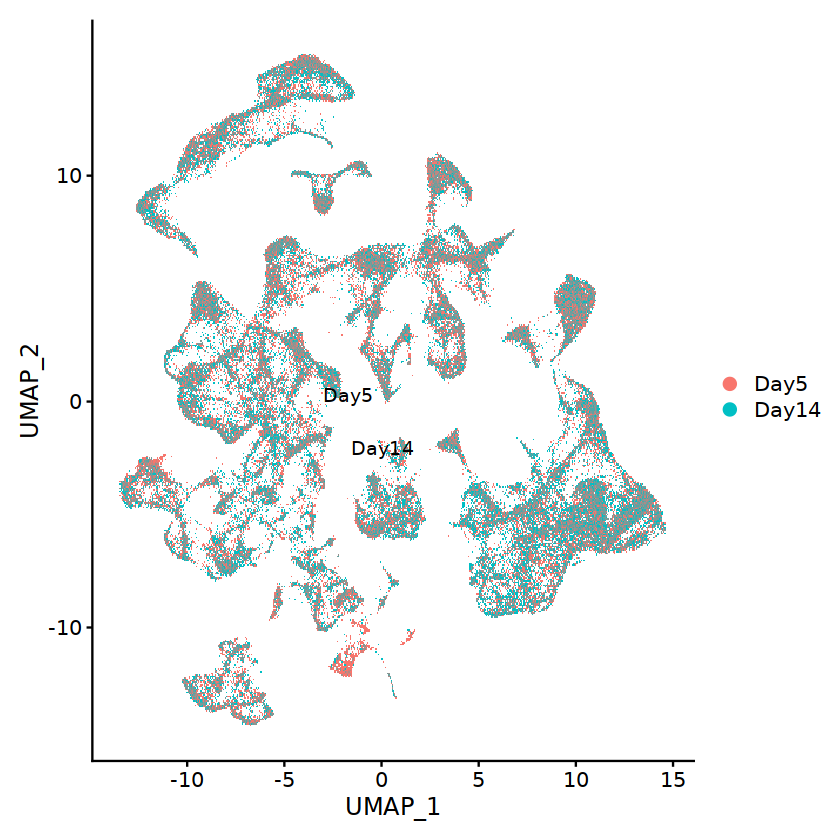

In [64]:
Idents(obj) <- obj %>% `[[` %>% pull(time)
DimPlot(obj, reduction = "umap", label=T, repel = T)

In [67]:
nhm = qs::qread('_targets/objects/nhm_Agrp___obob5v5')

In [68]:
nhm

1 2 3 4 5 6 7 8 9 10 ⋯ 281 282 283 284 285 286 287
SI-TT-A11_AAACCCAGTACGTTCA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAACGAACAAGTTTGC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAAGTCCTCGACATTG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAAGTCCTCGCCATAA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAATGGAAGAAACACT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACAAAGAGGACAAGA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACAAGACAGCTAACT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACACACCAGAGAGGG 0 0 0 0 0 1 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACCACACACCCTTGT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACCACACAGTAGAGC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACCACAGTACGGCAA 0 0 0 0 0 0 0 1 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AACCATGCAAGCGAAC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAGAACACATCGAAGG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAGATAGAGCGGGTTA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AAGCGAGAGCCATTCA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AATCACGCAGTTGGTT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   1   0   0   0  
SI-TT-A11_AATGCCAAGCGATTCT 0 0 0 0 0 1 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_AATGGAAGTGTTTGCA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACAAAGATCTTTGCTA 0 0 0 0 0 0 0 0 1 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACACCAAGTGTAAATG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACATCGAAGAAATTCG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACATTTCAGATCCGAG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACATTTCCACCTGTCT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACCATTTTCACGAACT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACCCTTGCACTGGCGT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACCGTTCAGTAACGTA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACCTGTCAGACTCTAC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACGATCAAGAGGACTC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACGATCATCCGTCCTA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-A11_ACGGAAGAGCTAAACA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
⋮                          ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮ ⋮  ⋱ ⋮   ⋮   ⋮   ⋮   ⋮   ⋮   ⋮  
SI-TT-G11_TGCATCCCACATTACG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGCCGAGTCATAAGGA 0 0 0 0 0 0 0 0 1 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGCTCCAAGCTAAGTA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGCTGAAGTACCGGCT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGAACTTCCACCCTA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGATGTCAGGACTTT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGGAGAAGTCGCGAA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGGATTAGATTAGTG 0 1 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGGTTATCGGTGAAG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGGTAGTCAAATCGGG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGTAGACAGCAGCAGT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGTGAGTGTGGAACAC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGTGGCGAGTGCAGGT 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGTGGCGTCGACATCA 0 0 0 0 0 0 0 0 0 1  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TGTTCTAAGGTGAGAA 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TTAATCCTCAGGAACG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TTAGGCAGTGTATACC 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TTCACGCAGATACAGT 0 0 0 0 0 0 1 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TTCCAATTCTGCAGCG 0 0 0 0 0 0 0 0 0 0  ⋯ 0   0   0   0   0   0   0  
SI-TT-G11_TTCGGTCAGGACTAAT 0 0 0 0 0 1 0 0 0 0  ⋯

In [7]:
meta = tar_meta()

In [12]:
meta %>%
filter(str_detect(name, 'milo_neuron'))

name type data command depend seed path time size bytes format repository
     iteration parent children seconds warnings error

In [73]:
DefaultAssay(obj) = 'integrated'

In [75]:
DefaultAssay(obj) = 'integrated'
integrated_rownames = obj@meta.data %>% rownames

In [76]:
DefaultAssay(obj) = 'RNA'
RNA_rownames = obj@meta.data %>% rownames

In [81]:
tibble(integrated_rownames, RNA_rownames) %>%
filter(integrated_rownames != RNA_rownames)

integrated_rownames RNA_rownames

In [ ]:
qs::qread('_targets/objects/milo_')

In [89]:
obj = qs::qread('_targets/objects/obj_Agrp')
obj

An object of class Seurat 
21774 features across 4638 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [90]:
obj@assays$RNA$counts

  [[ suppressing 32 column names ‘SI-TT-A11_AAACCCAGTACGTTCA’, ‘SI-TT-A11_AAACGAACAAGTTTGC’, ‘SI-TT-A11_AAAGTCCTCGACATTG’ ... ]]

  [[ suppressing 32 column names ‘SI-TT-A11_AAACCCAGTACGTTCA’, ‘SI-TT-A11_AAACGAACAAGTTTGC’, ‘SI-TT-A11_AAAGTCCTCGACATTG’ ... ]]

  [[ suppressing 32 column names ‘SI-TT-A11_AAACCCAGTACGTTCA’, ‘SI-TT-A11_AAACGAACAAGTTTGC’, ‘SI-TT-A11_AAAGTCCTCGACATTG’ ... ]]



19774 x 4638 sparse Matrix of class "dgCMatrix"
                                                                                             
Xkr4          7 4 5 4  8  7  7 2  6  6 5 3  4  1  2 12 7 3 2 2  9 2  7 8  5  2  7 30  2 . 3 .
Gm1992        . 1 . 1  3  .  1 .  1  5 1 .  6  .  6  1 4 2 . .  . .  . .  3  4  .  5  . . 4 .
Gm19938       . 1 . .  .  1  1 .  .  1 . .  .  .  .  . 2 . . .  1 .  . 1  .  .  .  2  . . . .
Gm37381       . . . .  .  .  . .  .  . . .  .  .  .  . . . . .  . .  . .  .  .  .  .  . . . .
Rp1           . . . .  .  .  1 .  .  . . .  .  .  .  . . . . .  1 .  . .  .  .  .  .  . . . .
Mrpl15        . . . .  .  .  . .  .  1 . .  1  .  .  1 . . . .  . .  . .  .  .  .  .  . . 1 .
Lypla1        . . . .  .  .  . .  2  1 . .  1  .  .  . . . . .  . .  . .  .  .  .  1  . . . .
Tcea1         . 1 . .  .  .  1 .  .  . . .  .  .  .  . . . . 1  2 .  1 .  2  .  .  4  1 . . .
Rgs20         . 3 . .  .  1  . .  .  . . .  .  .  .  . . . 2 1  1 . 14 1  .  2  1  7  . . . 1
Gm16041     

In [88]:
a = obj@assays$RNA %>% attributes

In [91]:
obj@assays$RNA

Assay (v5) data with 19774 features for 4638 cells
Top 10 variable features:
 Lingo2, Il1rapl2, Grm7, Gpc5, Zfp804b, Nrg1, Cntn4, Trpm3, Gm15398,
Lrrtm4 
Layers:
 scale.data, data, counts 

In [95]:
as(object = obj[["RNA"]], Class = "Assay") %>% str

Formal class 'Assay' [package "SeuratObject"] with 8 slots
  ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:15242994] 0 12 14 17 32 39 44 45 48 53 ...
  .. .. ..@ p       : int [1:4639] 0 2245 4637 6844 9955 13388 17266 20228 22388 25348 ...
  .. .. ..@ Dim     : int [1:2] 19774 4638
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:19774] "Xkr4" "Gm1992" "Gm19938" "Gm37381" ...
  .. .. .. ..$ : chr [1:4638] "SI-TT-A11_AAACCCAGTACGTTCA" "SI-TT-A11_AAACGAACAAGTTTGC" "SI-TT-A11_AAAGTCCTCGACATTG" "SI-TT-A11_AAAGTCCTCGCCATAA" ...
  .. .. ..@ x       : num [1:15242994] 7 1 1 4 1 3 6 4 1 1 ...
  .. .. ..@ factors : list()
  ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:15242994] 0 12 14 17 32 39 44 45 48 53 ...
  .. .. ..@ p       : int [1:4639] 0 2245 4637 6844 9955 13388 17266 20228 22388 25348 ...
  .. .. ..@ Dim     : int [1:2] 19774 4638
  .. .. ..@ Dimnames:List of 2
